# Iris Flower Classification ML Project

In [423]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')


### Dataset Description
- Iris is a small dataset for beginner level ML projects. 
- It has 150 observations with 4 features:
    1. Sepal Length in cm
    2. Sepal Width in cm
    3. Petal Length in cm
    4. Petal Width in cm
- The dataset contains 3 different species (50 observations for each species):
    1. Iris Setosa
    2. Iris Versicolour
    3. Iris Virginica
- There is no null value.

In [424]:
# Loading the data & previewing the dataset
df = pd.read_csv("iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [425]:
# Basic Dataset Information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [426]:
# Dataset Statistical Summary
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [427]:
# Checking for Null Values
df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [428]:
# Counting Number of Samples Each Species Contain
df['Species'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Analysing the data with visual representation

Text(0.5, 1.0, 'Types of Iris Species')

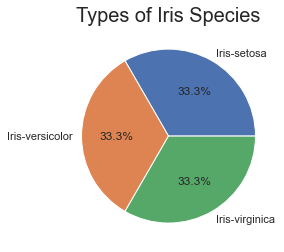

In [429]:
# Pie Chart to visualize the overall types of Iris Species
plt.pie(x=df['Species'].value_counts(), autopct='%1.1f%%', labels=df.Species.unique())
plt.title("Types of Iris Species", size=20)


In [430]:
# Correlation Matrix
df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


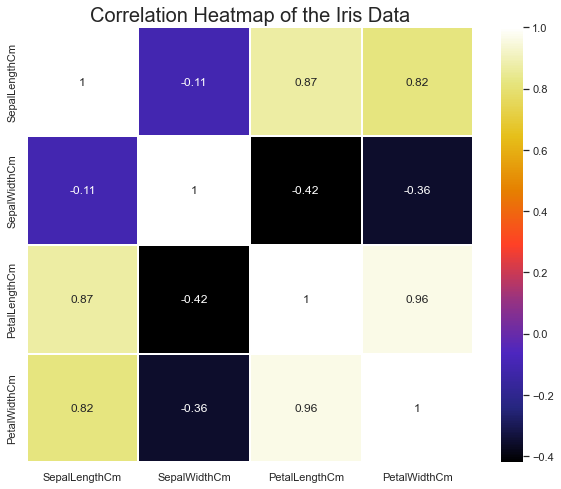

In [431]:
# Correlation Heatmap (Visualization of the Correlation Matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('Id', axis=1).corr(), cmap='CMRmap', annot=True, linewidths=2)
plt.title("Correlation Heatmap of the Iris Data", size=20)
plt.show()


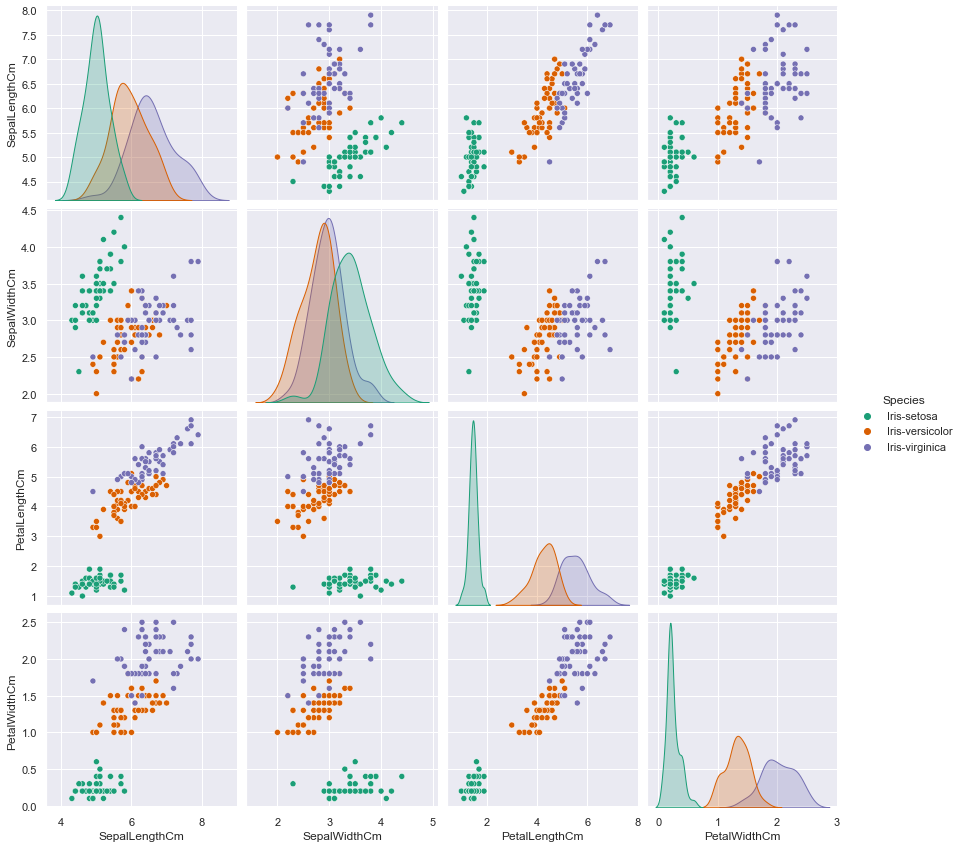

In [432]:
# Using pairplot to see the relation accross all feature combinations
sns.pairplot(df.drop('Id', axis=1), hue='Species', palette='Dark2', size=3)


In [433]:
# Label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df['Species'].unique()


array([0, 1, 2])

### Splitting the dataset for training and testing

In [434]:
# Defining the features
from sklearn.model_selection import train_test_split

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = df.loc[:, features].values
Y = df.Species
# Splitting dataset into train & test dataset
X_Train, X_Test, Y_Train, Y_Test = train_test_split(
    X, Y, test_size=0.20, random_state=0)


In [435]:
X_Train.shape


(120, 4)

In [436]:
X_Test.shape


(30, 4)

In [437]:
Y_Train.shape


(120,)

In [438]:
Y_Test.shape


(30,)

### Feature Scaling

In [439]:
# Feature Scaling to bring all the variables in a single scale.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)


In [440]:
# Importing some metrics for evaluating  models.
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


## Applying Different ML Models on the Dataset

### 1. Logistic Regression Model

In [441]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_Train, Y_Train)

# model training
log_reg.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_log_reg = log_reg.predict(X_Test)


In [442]:
Y_Pred_Test_log_reg


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [443]:
print("Accuracy:", metrics.accuracy_score(Y_Test, Y_Pred_Test_log_reg)*100)


Accuracy: 100.0


In [444]:
print(classification_report(Y_Test, Y_Pred_Test_log_reg))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [445]:
confusion_matrix(Y_Test, Y_Pred_Test_log_reg)


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

### 2. K-Neighbour Clustering

In [446]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(
    n_neighbors=3, weights='distance', algorithm='auto')

# model training
knn_model.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_knn = knn_model.predict(X_Test)


In [447]:
# model training
log_reg.fit(X_Train, Y_Train)


LogisticRegression(random_state=0)

In [448]:
Y_Pred_Test_knn


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [449]:
print("Accuracy:", metrics.accuracy_score(Y_Test, Y_Pred_Test_knn)*100)


Accuracy: 96.66666666666667


In [450]:
print(classification_report(Y_Test, Y_Pred_Test_knn))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [451]:
confusion_matrix(Y_Test, Y_Pred_Test_knn)


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

### 3. Decision Tree Classifier

In [452]:
# DecisionTreeClassifier .
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(
    criterion='entropy', splitter='best', max_depth=6)

# model training
dec_tree.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_dtr = dec_tree.predict(X_Test)


In [453]:
Y_Pred_Test_dtr


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [454]:
print("Accuracy:", metrics.accuracy_score(Y_Test, Y_Pred_Test_dtr)*100)


Accuracy: 100.0


In [455]:
print(classification_report(Y_Test, Y_Pred_Test_dtr))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [456]:
confusion_matrix(Y_Test, Y_Pred_Test_dtr)


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

### 4. Gaussian Naive Bayes Model

In [457]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nav_byes = GaussianNB()

# model training
nav_byes.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_nvb = nav_byes.predict(X_Test)


In [458]:
Y_Pred_Test_nvb


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [459]:
print("Accuracy:", metrics.accuracy_score(Y_Test, Y_Pred_Test_nvb)*100)


Accuracy: 96.66666666666667


In [460]:
print(classification_report(Y_Test, Y_Pred_Test_nvb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [461]:
confusion_matrix(Y_Test, Y_Pred_Test_nvb)


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

### 5. Random Forest Classifier

In [462]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
Ran_for = RandomForestClassifier(n_estimators=10, criterion='entropy')

# model training
Ran_for.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_rf = Ran_for.predict(X_Test)


In [463]:
Y_Pred_Test_rf


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [464]:
print("Accuracy:", metrics.accuracy_score(Y_Test, Y_Pred_Test_rf)*100)


Accuracy: 96.66666666666667


In [465]:
print(classification_report(Y_Test, Y_Pred_Test_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [466]:
confusion_matrix(Y_Test, Y_Pred_Test_rf)


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

### 6. Support Vector Classifier

In [467]:
# Support Vector Classifier
from sklearn.svm import SVC
svm_model = SVC(C=500, kernel='rbf')

# model training
svm_model.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_svm = svm_model.predict(X_Test)


In [468]:
Y_Pred_Test_svm

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [469]:
print("Accuracy:", metrics.accuracy_score(Y_Test, Y_Pred_Test_svm)*100)


Accuracy: 100.0


In [470]:
print(classification_report(Y_Test, Y_Pred_Test_svm))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [471]:
confusion_matrix(Y_Test, Y_Pred_Test_svm)


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

### Accuracy Scores of Different Models

In [472]:
# Model Evaluation Results
print("Accuracy of Logistic Regression Model:",
      metrics.accuracy_score(Y_Test, Y_Pred_Test_log_reg)*100)
print("Accuracy of KNN Model:", metrics.accuracy_score(
    Y_Test, Y_Pred_Test_knn)*100)
print("Accuracy of Decision Tree Model:",
      metrics.accuracy_score(Y_Test, Y_Pred_Test_dtr)*100)
print("Accuracy of Naive Bayes Model:",
      metrics.accuracy_score(Y_Test, Y_Pred_Test_nvb)*100)
print("Accuracy of Random Forest Classification Model:",
      metrics.accuracy_score(Y_Test, Y_Pred_Test_rf)*100)
print("Accuracy of SVM Model:", metrics.accuracy_score(
    Y_Test, Y_Pred_Test_svm)*100)


Accuracy of Logistic Regression Model: 100.0
Accuracy of KNN Model: 96.66666666666667
Accuracy of Decision Tree Model: 100.0
Accuracy of Naive Bayes Model: 96.66666666666667
Accuracy of Random Forest Classification Model: 96.66666666666667
Accuracy of SVM Model: 100.0


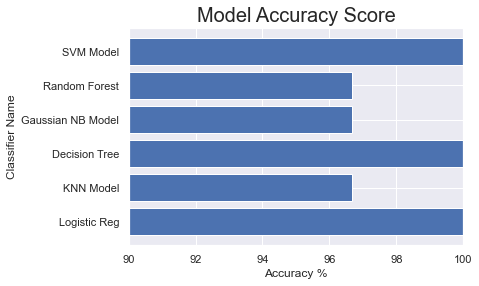

In [473]:
# Accuracy Plot of Models
scores = (metrics.accuracy_score(Y_Test, Y_Pred_Test_log_reg)*100,
          metrics.accuracy_score(Y_Test, Y_Pred_Test_knn)*100,
          metrics.accuracy_score(Y_Test, Y_Pred_Test_dtr)*100,
          metrics.accuracy_score(Y_Test, Y_Pred_Test_nvb)*100,
          metrics.accuracy_score(Y_Test, Y_Pred_Test_rf)*100,
          metrics.accuracy_score(Y_Test, Y_Pred_Test_svm)*100)
plt.barh(['Logistic Reg', 'KNN Model', 'Decision Tree',
         'Gaussian NB Model', 'Random Forest', 'SVM Model'], scores)
plt.xlim(90, 100)
plt.title("Model Accuracy Score", size=20)
plt.ylabel("Classifier Name")
plt.xlabel("Accuracy %")
plt.show()


# Conclusion
- Our dataset is not very large and contains only 150 rows, with 3 species uniformly distributed.
- **PetalLength** and **PetalWidth** is highly corelated with each other.
- We tried 6 different Machine Learning Classifications models :
    1. Logistic Regression Model
    2. KNN Clustering Model
    3. Decision Tree Model
    4. Naive Bayes Model
    5. Random Forest Model
    6. SVM Model
- We had 4 features (SepalLength, SepalWidth, PetalLength, PetalWidth) to classify the flowers into 3 different species (Iris Setosa, Iris Versicolor, Iris Virginica).
- We got very high accuracy score for all the models. Even we got accuracy score of 100 for **Logistic Regression, Decision Tree** and **SVM model**.
